In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import music21

In [18]:
df = pd.read_csv('output/preprocessed_output.csv')

# data extraction
df = df.filter(['root_octave', 'root_name', 'duration'], axis=1)
df.dropna(inplace=True)


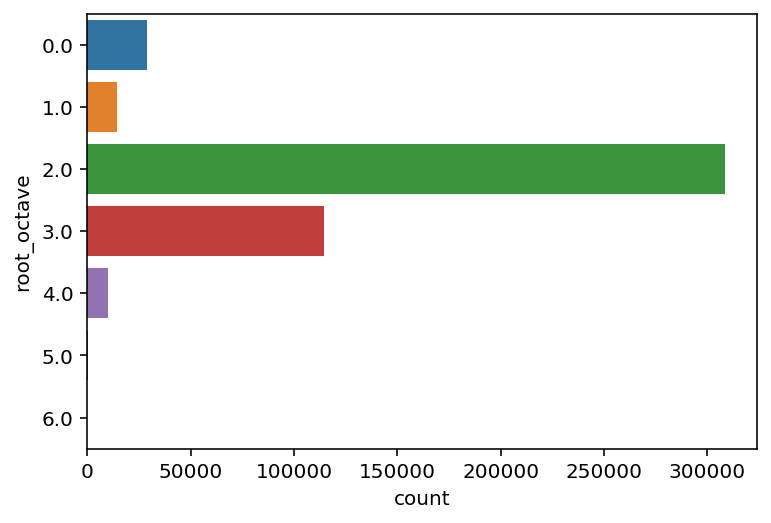

In [19]:
# visualize octave
sns.countplot(y='root_octave', data=df)

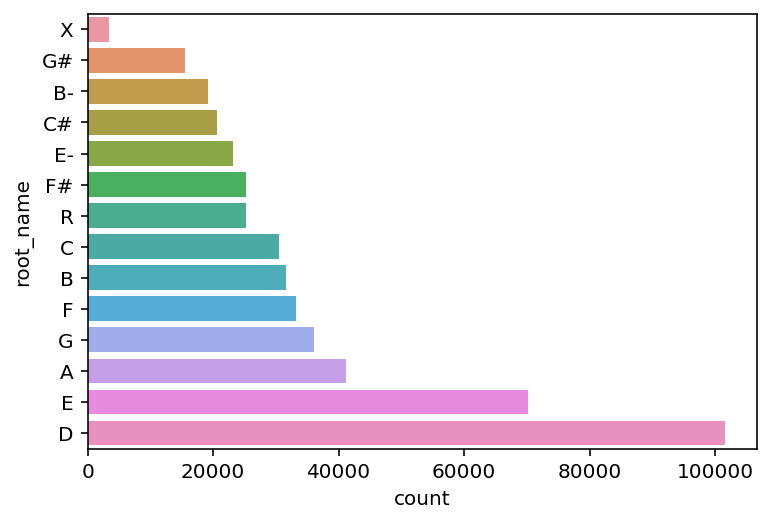

In [20]:
#visualize notes
sns.countplot(y='root_name', data=df ,order=df['root_name'].value_counts().sort_values().index)

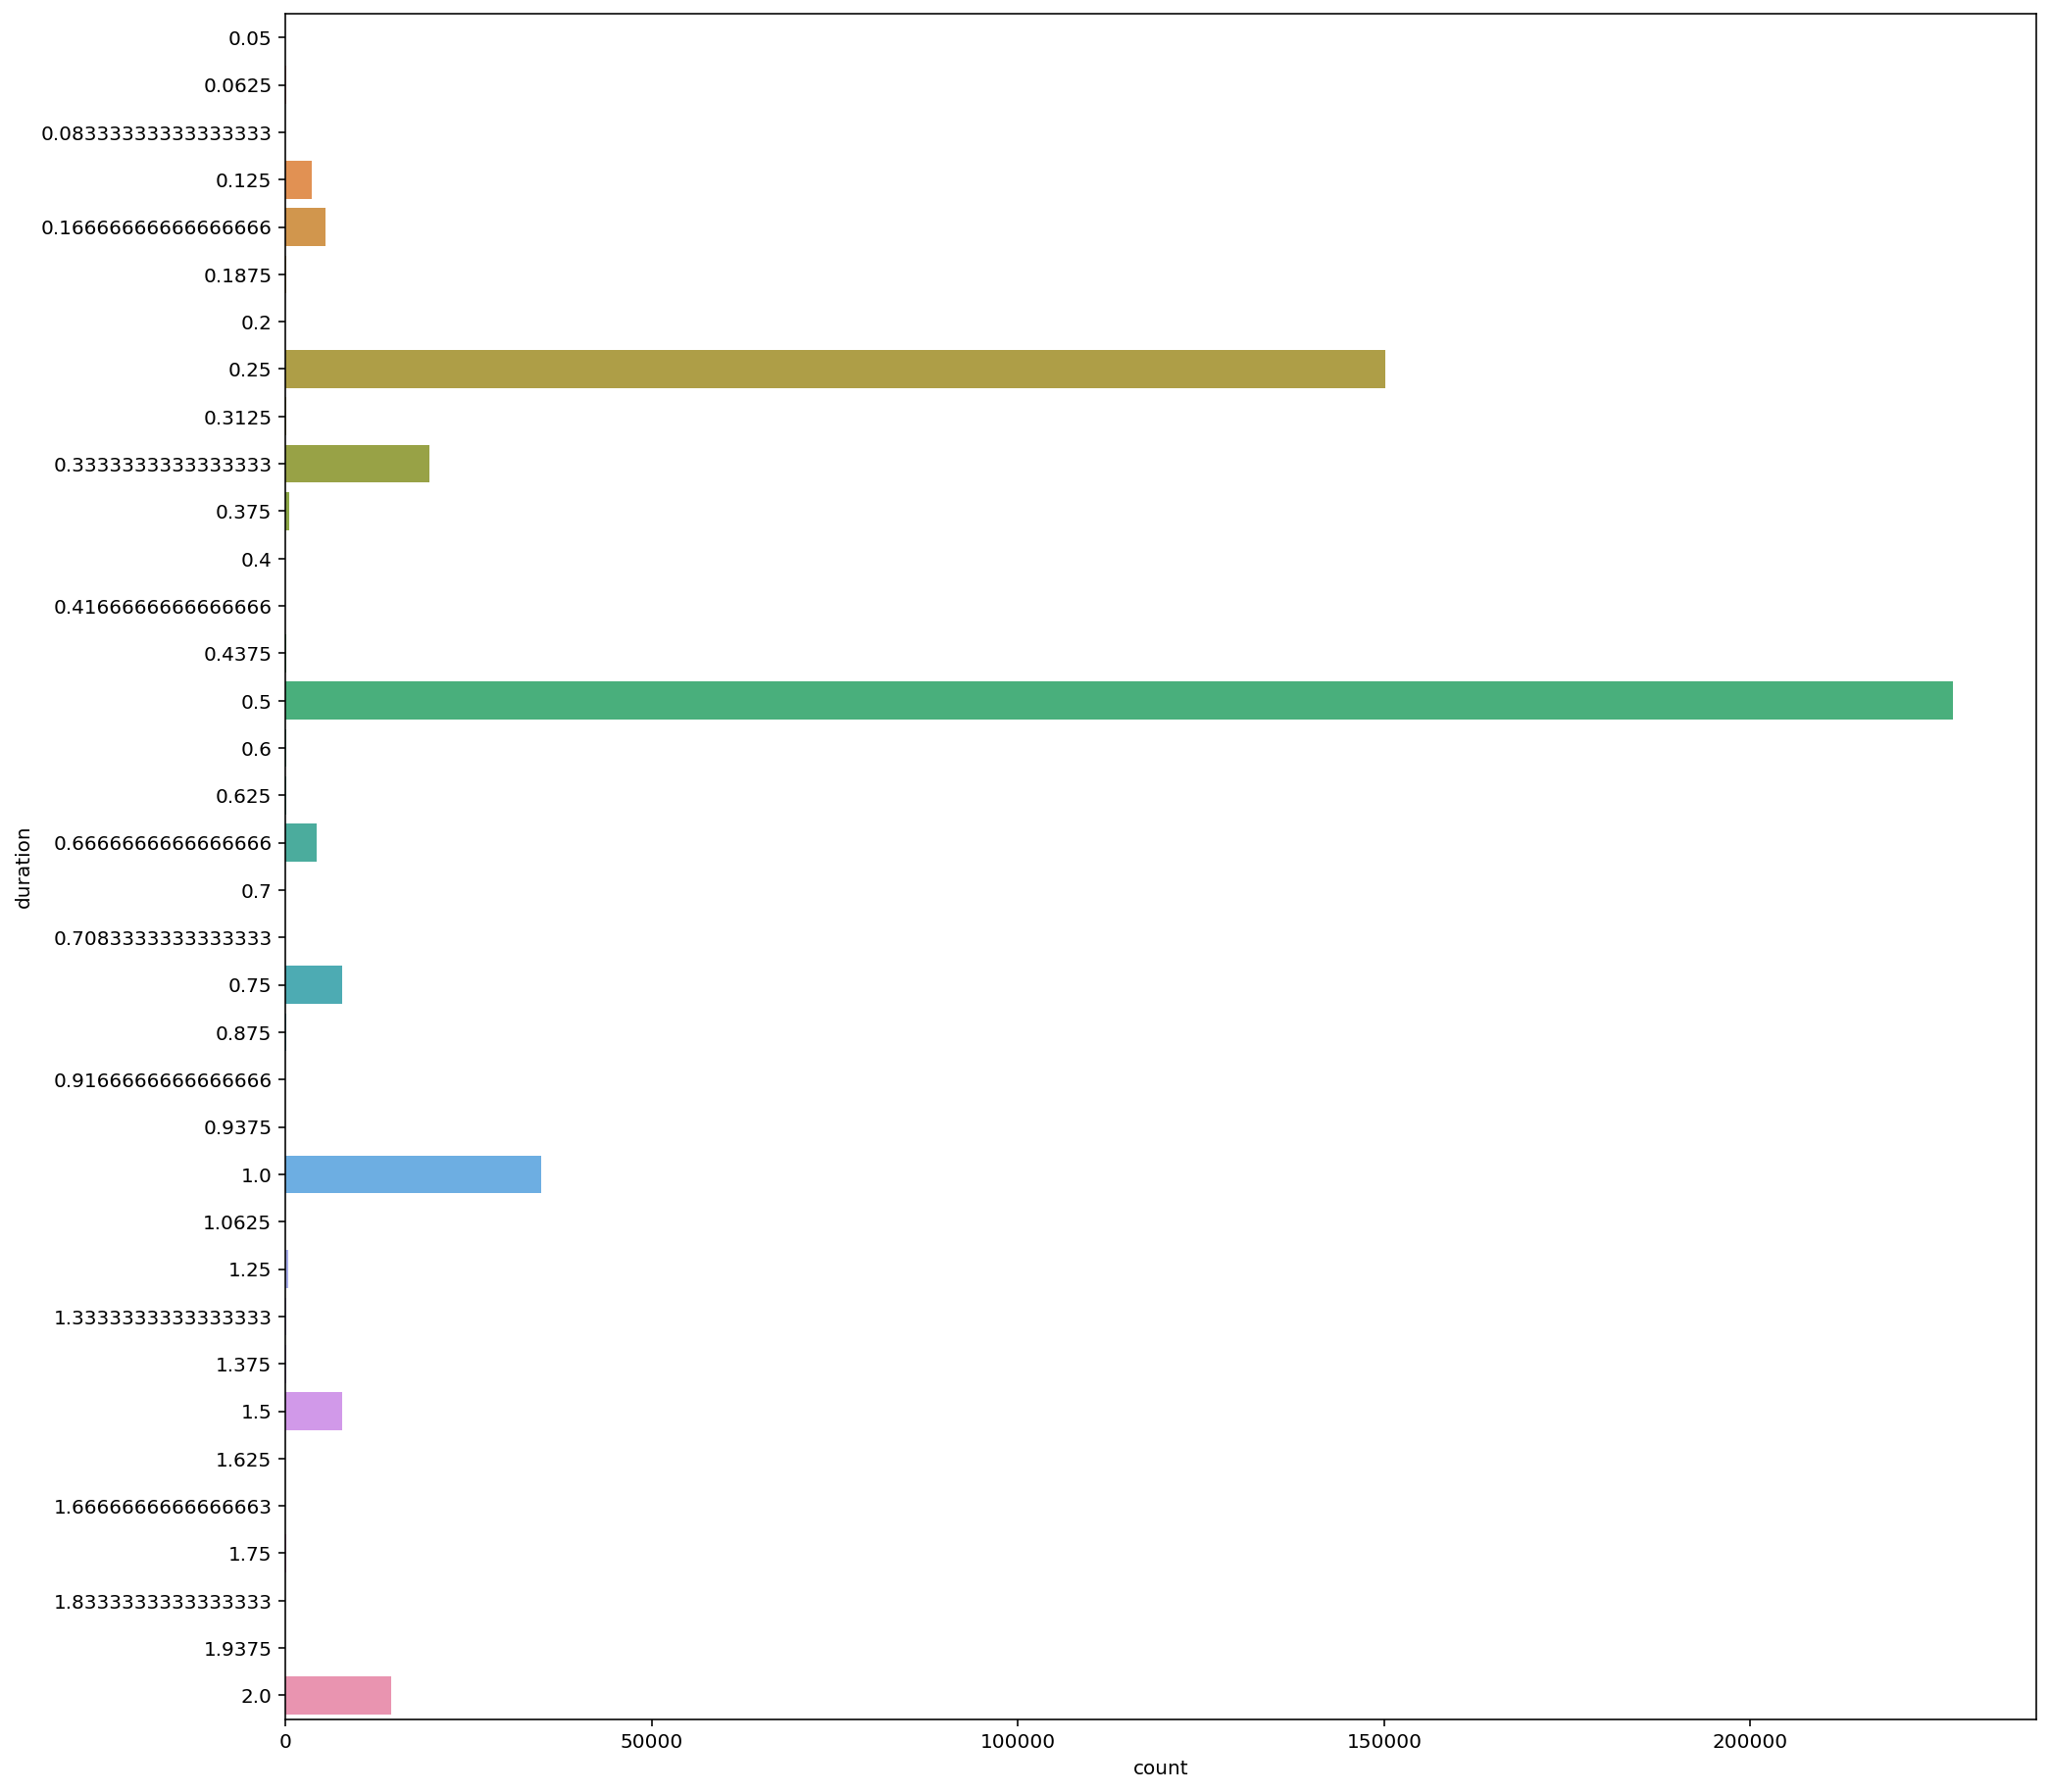

In [21]:
# visualize durations
plt.figure(figsize=(16, 16))
sns.countplot(y='duration', data=df)

In [ ]:
#sns.plot(y='root_freq', data=df)

[2.         1.         0.25       0.5        0.66666667 0.75
 1.5        1.75       0.16666667 0.33333333 1.33333333 0.125
 1.25       0.375      0.70833333 0.875      0.625      0.0625
 1.0625     0.4375     0.9375     1.9375     0.1875     0.3125
 0.08333333 0.7        0.2        1.375      0.91666667 1.66666667
 1.83333333 0.41666667 0.6        0.05       0.4        1.625     ]

unique durations:  36


[2.         1.         0.25       0.5        0.66666667 0.75
 1.5        1.75       0.16666667 0.33333333 1.33333333 0.125
 1.25       0.375     ]

unique durations after normalization :  14


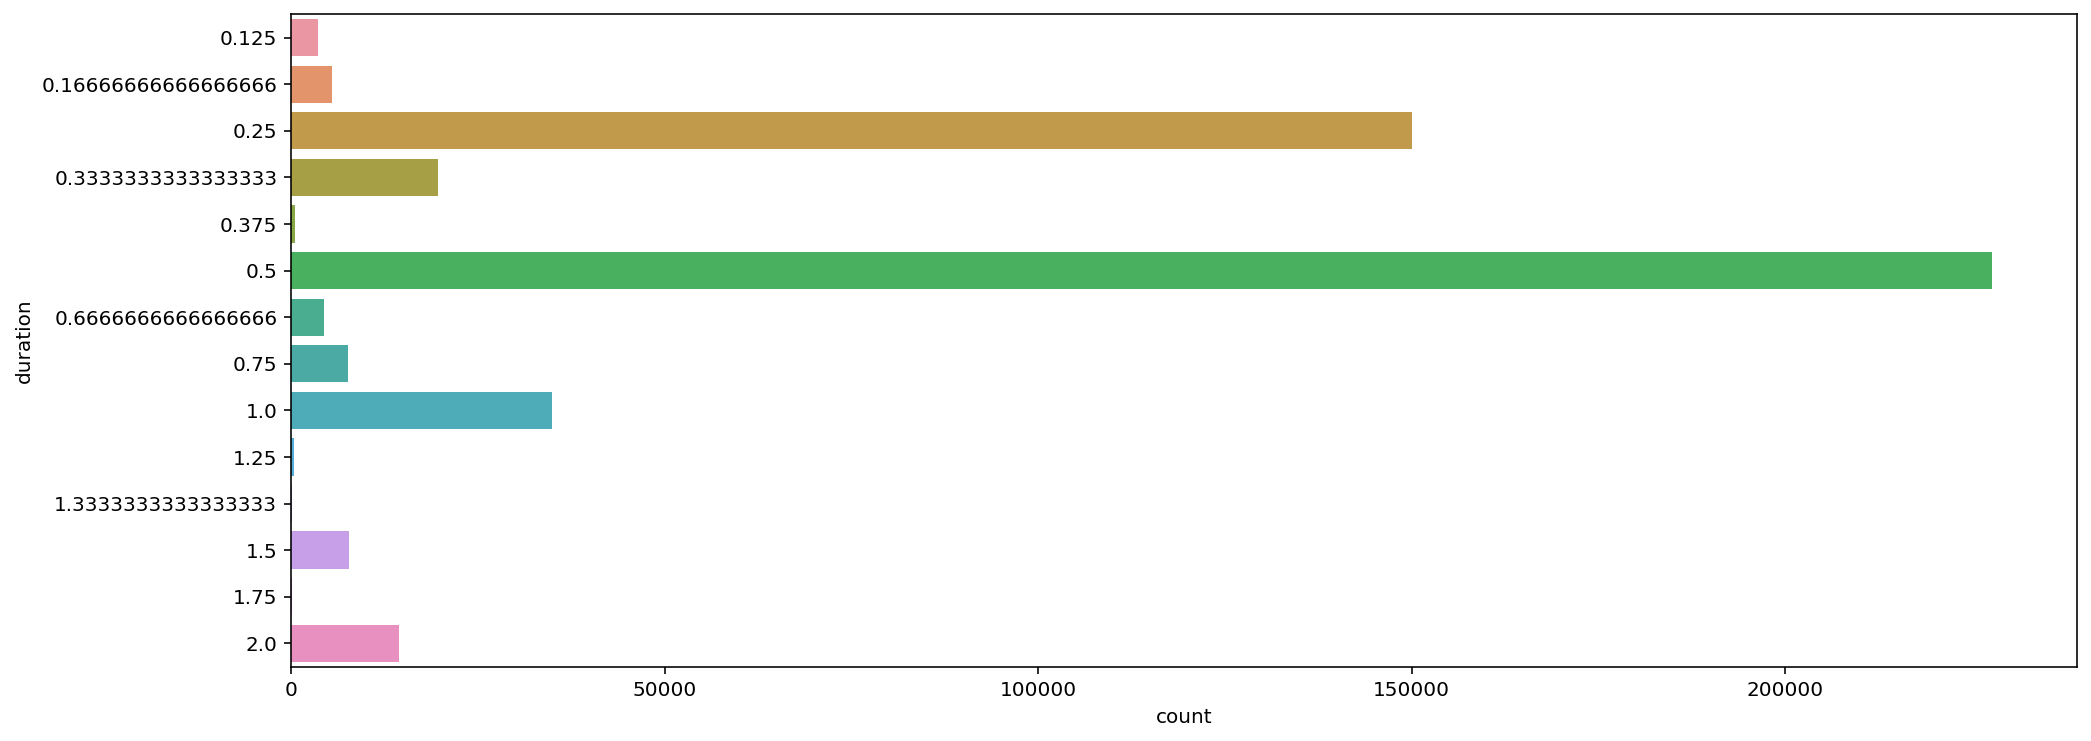

In [22]:
print(df['duration'].unique())
print()
print('unique durations: ', len(df['duration'].unique()))
print()

def get_closest_value(value, available_values):
    pos = (np.abs(available_values-value)).argmin()
    return available_values[pos]

def normalize_duration(df, threshold=100):
    x = df['duration'].value_counts()
    values_to_process = x[x.lt(threshold)].keys().to_numpy()
    available_values =  x[x.ge(threshold)].keys().to_numpy()
    vals = {}
    for value in values_to_process:
        vals[value] = get_closest_value(value, available_values)
        
    return df.replace(vals)
        
df = normalize_duration(df)
print()
print(df['duration'].unique())
print()
print('unique durations after normalization : ', len(df['duration'].unique()))

# visualize durations
plt.figure(figsize=(16, 6))
sns.countplot(y='duration', data=df)

In [23]:
print(df['root_name'].unique())

print('--- notes stats')
df.groupby(['root_octave', 'root_name']).size()

['D' 'E' 'E-' 'G' 'A' 'G#' 'C' 'F' 'C#' 'R' 'F#' 'B-' 'B' 'X']
--- notes stats


root_octave  root_name
0.0          R            25269
             X             3340
1.0          A             2241
             B            11340
             B-             865
             F#              34
2.0          A            32347
             B            18120
             B-           17298
             C             6489
             C#            9080
             D            70614
             E            48658
             E-           14870
             F            26885
             F#           21012
             G            29290
             G#           13964
3.0          A             6332
             B             2036
             B-             908
             C            21250
             C#           10654
             D            28365
             E            20116
             E-            7678
             F             5808
             F#            3854
             G             6274
             G#            1399
4.0          A   

In [32]:
# calculate all posible event types
df['event'] = df.apply(lambda row: row['root_name'] + str(row['root_octave'])  + ' ' + str(row['duration']), axis=1)
print(len(df['event'].unique()))

482


In [33]:
new = df[df['duration'] <= 1]
len(new['duration'].unique())

9

In [34]:
df = pd.read_csv('output/raw_output.csv') #output/preprocessed_output.csv')

processed = pd.DataFrame()
songs_count = len(df['song'].unique())
octave_range = []
for song_idx in range(1, songs_count):
    song = df[df['song'] == song_idx]
    if len(song):
        min_octave = song['root_octave'].min()
        max_octave = song['root_octave'].max()
        min_midi = song['root_midi'].min()
        max_midi = song['root_midi'].max()
        min_note = music21.note.Note(min_midi).nameWithOctave.replace('-', '')
        max_note = music21.note.Note(max_midi).nameWithOctave.replace('-', '')
        
        octave_range.append(max_octave - min_octave)
        #print(min_octave, max_octave, str(max_octave - min_octave), min_note, max_note)
  


In [44]:
df

,Unnamed: 0,duration,ghostNote,hammer,index,octave,palmMute,root_note,slides,song
0,0,2.0,0.0,0.0,0.0,2.0,0.0,D2,0.0,1
1,2,2.0,0.0,0.0,2.0,2.0,0.0,D2,0.0,1
2,3,2.0,0.0,0.0,3.0,3.0,0.0,E3,0.0,1
3,4,2.0,0.0,0.0,4.0,3.0,0.0,E3,0.0,1
4,5,2.0,0.0,0.0,5.0,2.0,0.0,D2,0.0,1
...,...,...,...,...,...,...,...,...,...,...
476657,495319,0.5,0.0,0.0,495763.0,2.0,0.0,F2,0.0,524
476658,495320,0.5,0.0,0.0,495764.0,2.0,0.0,G2,0.0,524
476659,495321,0.5,0.0,0.0,495765.0,2.0,0.0,G2,0.0,524
476660,495322,0.5,0.0,0.0,495766.0,2.0,0.0,E2,0.0,524


In [ ]:
import music21
note = music21.pitch.Pitch('G3')
x = str(note.transpose(music21.interval.Interval(+7)))  
print(x)

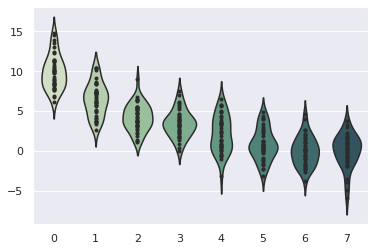

In [7]:
import numpy as np
import seaborn as sns

df = pd.read_csv('output/preprocessed_output.csv')
song = df[df['song'] == 1]

sns.set()

# Create a random dataset across several variables
rs = np.random.RandomState(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(data=d, palette=pal, inner="points")

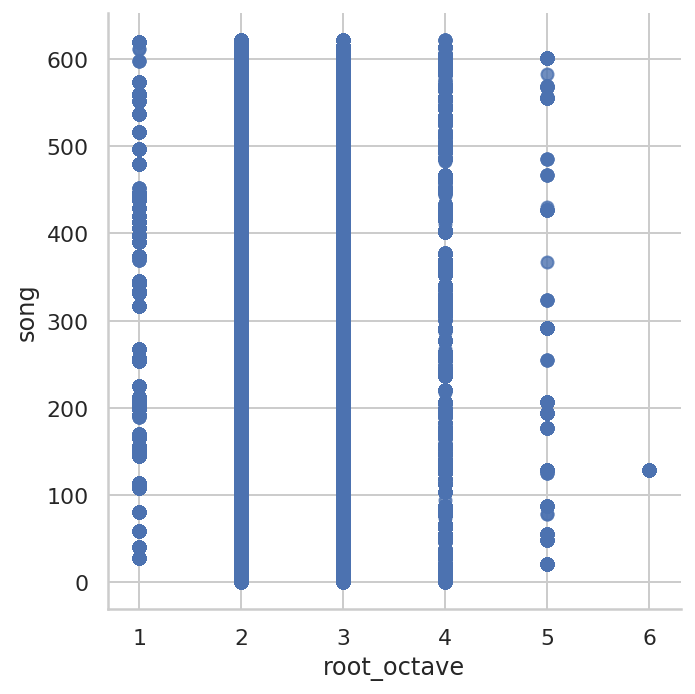

In [36]:
from dask.diagnostics import ProgressBar
sns.set(style="whitegrid")
sns.lmplot('root_octave','song', data=df, fit_reg=False)


/home/jasam/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/jasam/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


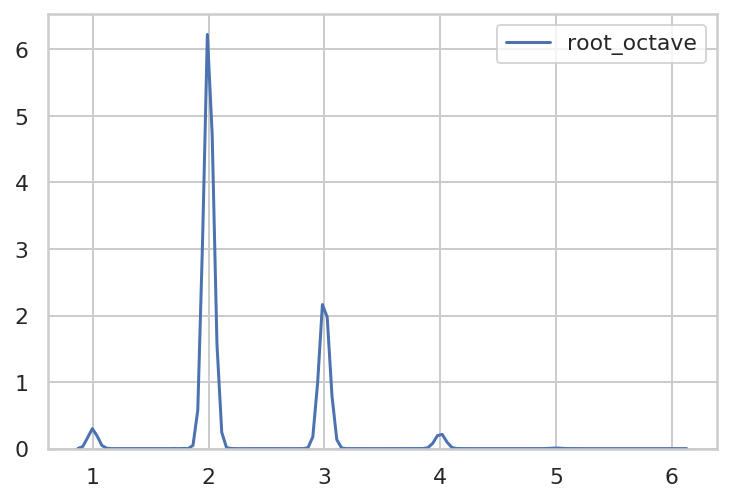

In [37]:
sns.kdeplot(df.root_octave)

In [2]:
df = pd.read_csv('output/processed_output.csv')

In [5]:
pip install pandas-profiling

     |████████████████████████████████| 133kB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 614kB 11.1MB/s eta 0:00:01
     |████████████████████████████████| 737kB 10.9MB/s eta 0:00:01
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=667c1be3b2033e4e5bf412325f7ba6c3cefaaec5dd914707da44fc4a657b1225
  Stored in directory: /home/jasam/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27086 sha256=389493e2503f422310a2ee412e5ac5384fe7867bf204ca0677cb6b23e1173e80
  Stored in directory: /home/jasam/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.0.0-cp37-none-any.whl size=17486 sha256=201d75d1a7797aa1fbb145b938e1bf0dbb5259e663220443b26d9230790156a9
  Stored in directory: /home/jasam/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e

In [ ]:
import pandas_profiling

df = pd.read_csv('output/processed_output.csv')
pandas_profiling.ProfileReport(df)